In [3]:
import numpy as np
import pandas as pd
import sklearn as sk

In [4]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore


In [6]:
print(tf.__version__)
print(sk.__version__)
print(np.__version__)
print(pd.__version__)

2.18.0
1.5.2
1.26.4
2.2.3


In [7]:
training_dir="C:\\Users\\HP5CD\\Downloads\\archive\\chest_xray\\train"
training_generator= ImageDataGenerator(rescale=1./255)
training_data = training_generator.flow_from_directory(training_dir, target_size=(200,200), class_mode='binary')

Found 5216 images belonging to 2 classes.


In [8]:
val_dir=r"C:\Users\HP5CD\Downloads\archive\chest_xray\val"
val_generator= ImageDataGenerator(rescale=1./255)
val_data = val_generator.flow_from_directory(val_dir, target_size=(200,200), class_mode='binary')

Found 16 images belonging to 2 classes.


In [9]:
test_dir=r"C:\Users\HP5CD\Downloads\archive\chest_xray\test"
test_generator= ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(test_dir, target_size=(200,200), class_mode='binary')

Found 624 images belonging to 2 classes.


In [10]:
import tensorflow as tf # type: ignore

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(training_data,
            validation_data=val_data,
            epochs=100,
            verbose=1)

C:\Users\HP5CD\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 603ms/step - acc: 0.7285 - loss: 0.6067 - val_acc: 0.6250 - val_loss: 0.7137
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - acc: 0.9190 - loss: 0.2036 - val_acc: 0.7500 - val_loss: 0.4005
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 627ms/step - acc: 0.9509 - loss: 0.1272 - val_acc: 0.9375 - val_loss: 0.2439
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 613ms/step - acc: 0.9613 - loss: 0.1025 - val_acc: 0.8125 - val_loss: 0.2156
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 633ms/step - acc: 0.9674 - loss: 0.0888 - val_acc: 0.8750 - val_loss: 0.2295
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 619ms/step - acc: 0.9665 - loss: 0.0926 - val_acc: 0.9375 - val_loss: 0.2232
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 620ms/step - acc: 0.9721 - loss: 0.0692 - val_acc: 0.8750 - val_loss: 0.2681
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 624ms/step - acc: 0.9784 - loss: 0.0559 - val_acc: 0.9375 - val_loss: 0.1510
Epoch 9/100
163/

<Figure size 640x480 with 0 Axes>

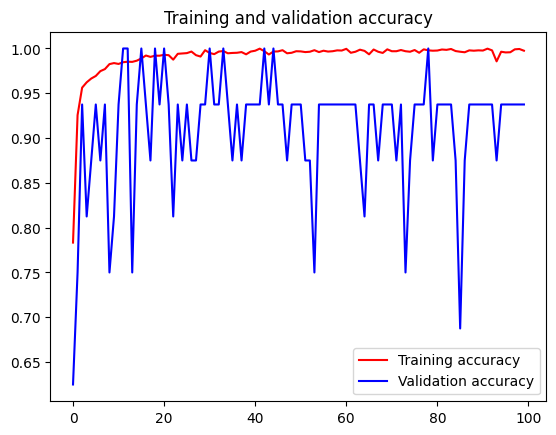

<Figure size 640x480 with 0 Axes>

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print("Loss of the model is -", test_loss * 100, "%")
print("Accuracy of the model is -", test_accuracy * 100, "%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - acc: 0.8119 - loss: 3.8329
Loss of the model is - 372.22650051116943 %
Accuracy of the model is - 80.7692289352417 %


In [16]:
model.save("model2.h5")
model.save("pneumonia_model2.keras")

In [17]:
from tensorflow.keras.models import model_from_json # type: ignore
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
import pickle

# Assuming your trained model is stored in a variable called 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")


Model saved as model.pkl
